# Multi Layer Perceptron Model 7 : **fake-news-classification Dataset**:

In [38]:
# Dataset from Kaggle
!kaggle datasets download -d saurabhshahane/fake-news-classification

Dataset URL: https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification
License(s): Attribution 4.0 International (CC BY 4.0)
 94% 87.0M/92.1M [00:00<00:00, 111MB/s] 
100% 92.1M/92.1M [00:00<00:00, 97.8MB/s]


In [39]:
# unzip the downloaded dataset
! unzip /content/fake-news-classification.zip

Archive:  /content/fake-news-classification.zip
  inflating: WELFake_Dataset.csv     


   Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1  


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8584 - loss: 0.3422 - val_accuracy: 0.9388 - val_loss: 0.1599
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9550 - loss: 0.1310 - val_accuracy: 0.9430 - val_loss: 0.1531
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.9671 - loss: 0.0959 - val_accuracy: 0.9458 - val_loss: 0.1671
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9780 - loss: 0.0681 - val_accuracy: 0.9485 - val_loss: 0.1797
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9832 - loss: 0.0517 - val_accuracy: 0.9497 - val_loss: 0.1782
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.9860 - loss: 0.0415 - val_accuracy: 0.9485 - val_loss: 0.2053
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9884 - loss: 0.0359 - val_accuracy: 0.9499 - val_loss: 0.2321
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9890 - loss: 

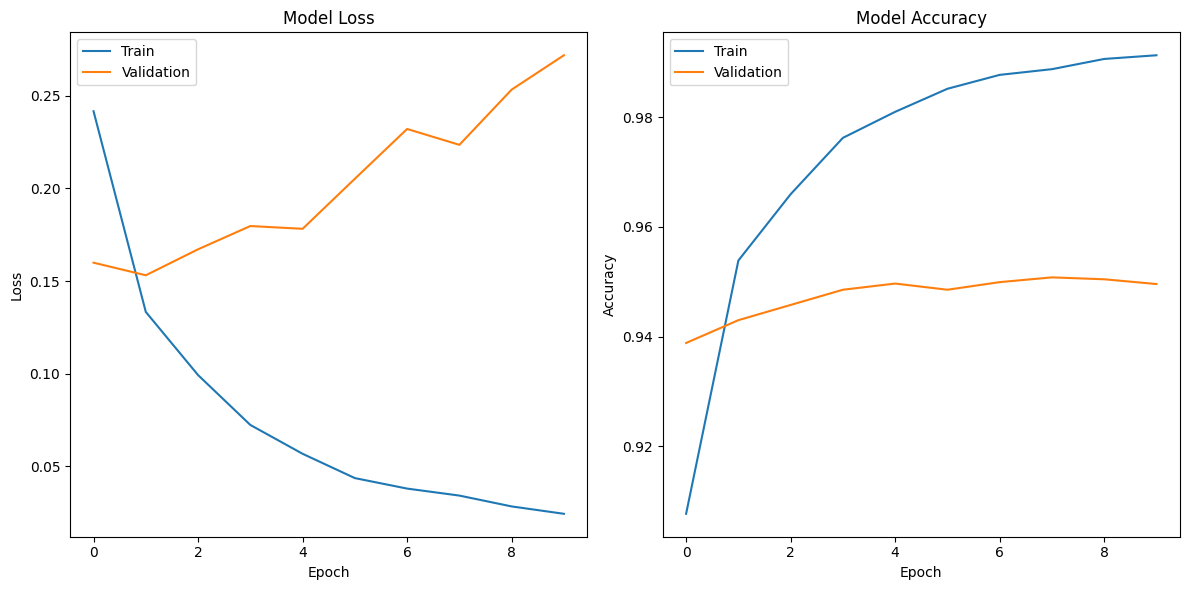

In [40]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load your dataset
url = './WELFake_Dataset.csv'  # Update this with your dataset path
df = pd.read_csv(url)

# Handle missing values in 'text' column
df['text'] = df['text'].fillna('')  # Replace NaN values with empty strings

# Display the first few rows
print(df.head())

# Features and labels
X = df['text']
y = df['label']

# Text preprocessing
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_vectorized = vectorizer.fit_transform(X).toarray()  # Now this should work without errors

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y_encoded, test_size=0.2, random_state=42)

# Build the MLP model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Number of classes

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

# Plot training & validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()